### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 11 - SOLUTION</span>

### Exercise 11.1

Fit the following linear function
$$
f(x)=2x+1
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

I start to vary parameters with $\sigma$ fixed to $0.0$, then increase it to $0.2$ and $0.5$.

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Different models for 0 gaussian noise


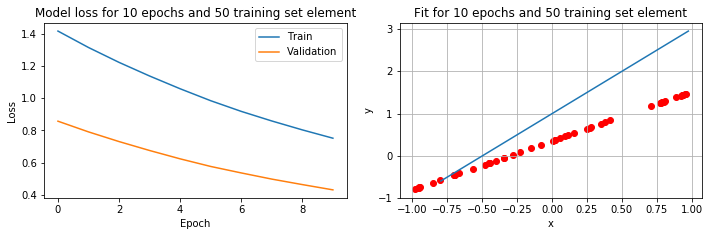

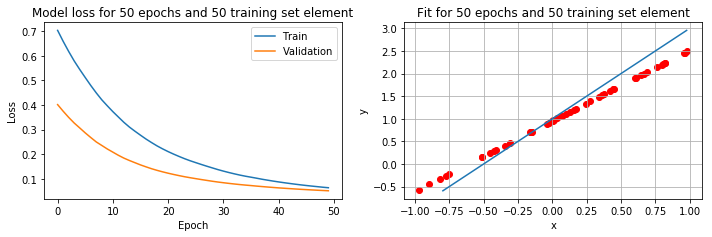

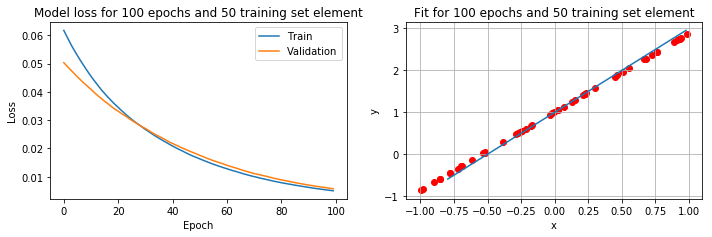

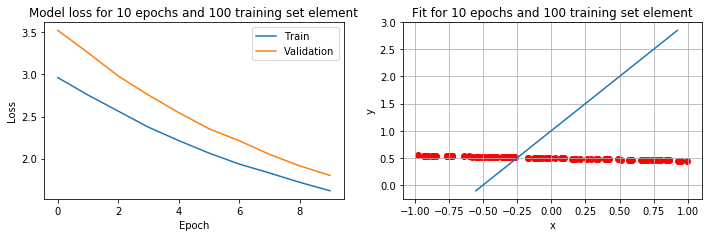

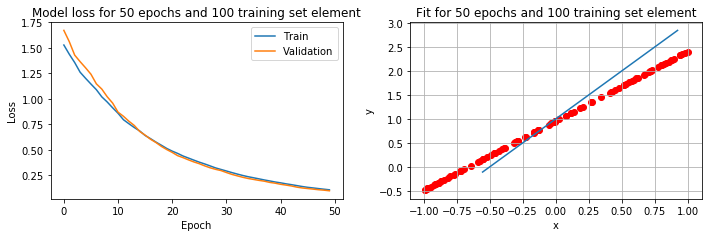

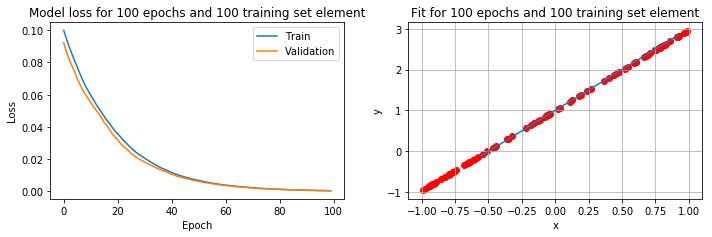

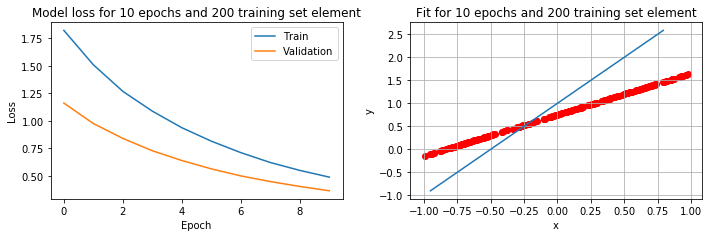

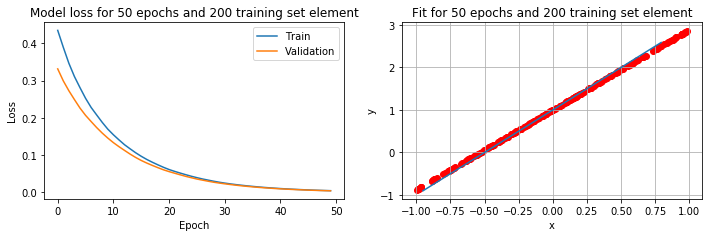

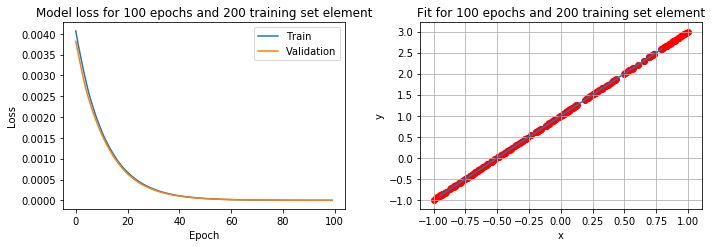

In [3]:
n_epochs = [10, 50, 100]
n_train = [50, 100, 200]

row=len(n_epochs)*len(n_train)
cols=2

i=1
sigma=0
print('Different models for '+str(sigma)+' gaussian noise')
for n in n_train:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in n_epochs:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0)
            
        plt.figure(figsize=(10,3*row))
           
        plt.subplot(row, cols, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()
          
        plt.subplot(row, cols, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, n)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
            
        plt.tight_layout()
        plt.show()
            
        i=i+2;

As we can see, with no gaussian noise is pretty easy to reach the convergence between training loss and validation loss: 10 epochs are not enough for every dataset, instead 50 epochs are enough for bigger training set. So in the next analysis I don't train the network for 10 epochs.

Different models for 0.2 gaussian noise


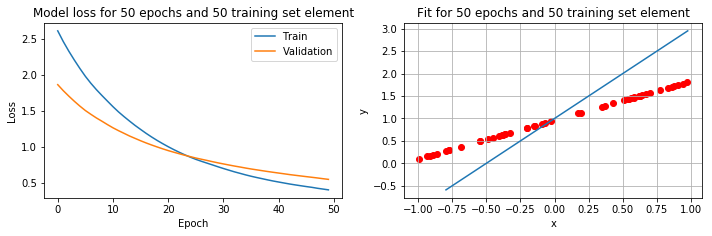

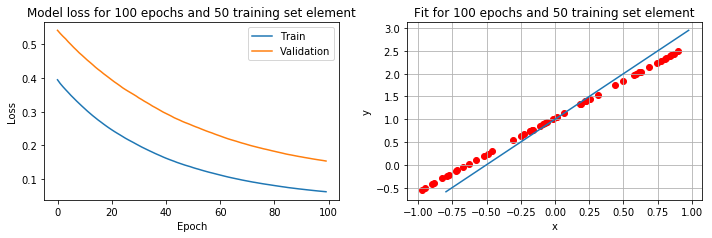

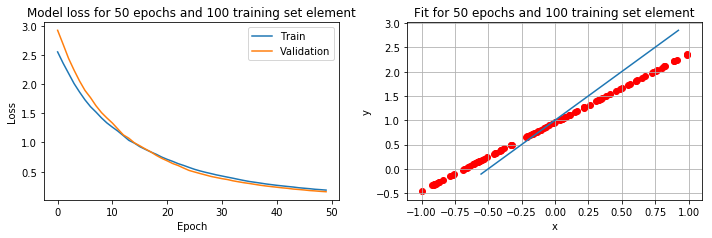

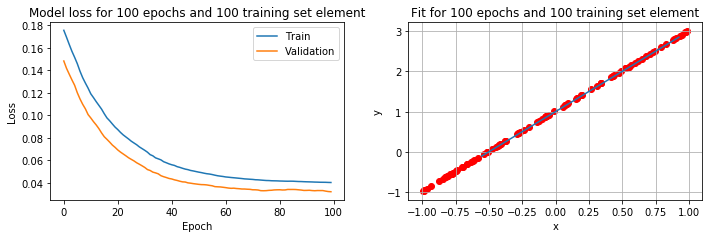

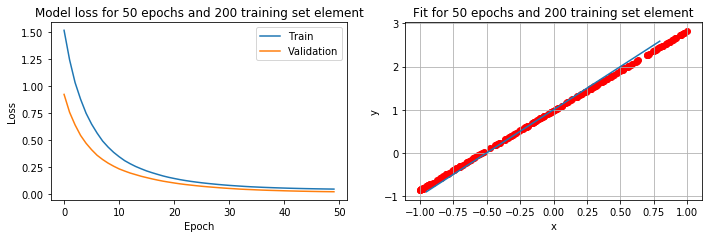

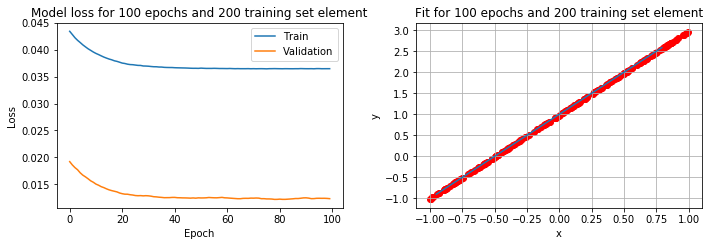

In [4]:
n_epochs = [50, 100]
n_train = [50, 100, 200]

row=len(n_epochs)*len(n_train)
cols=2

i=1
sigma=0.2
print('Different models for '+str(sigma)+' gaussian noise')
for n in n_train:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in n_epochs:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0)
            
        plt.figure(figsize=(10,3*row))
           
        plt.subplot(row, cols, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()
          
        plt.subplot(row, cols, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, n)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
            
        plt.tight_layout()
        plt.show()
            
        i=i+2;

As we can see, 50 training set element are not enough to make a good prediction with nonzero noise, so I suppress it.

Different models for 0.5 gaussian noise


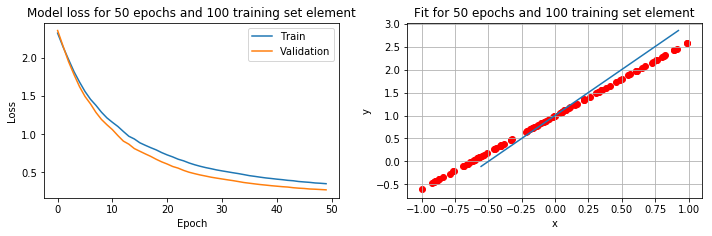

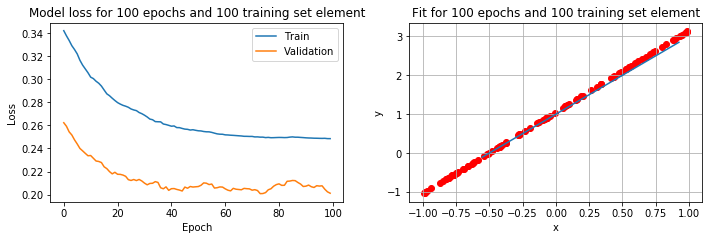

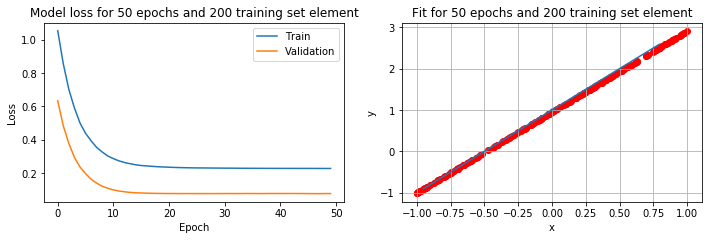

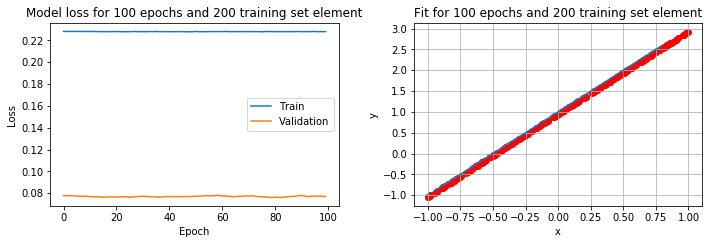

In [5]:
n_epochs = [50, 100]
n_train = [100, 200]

row=len(n_epochs)*len(n_train)
cols=2

i=1
sigma=0.5
print('Different models for '+str(sigma)+' gaussian noise')
for n in n_train:
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    for e in n_epochs:
        history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=e,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid), verbose=0)
            
        plt.figure(figsize=(10,3*row))
           
        plt.subplot(row, cols, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss for '+str(e)+' epochs and '+str(n)+' training set element')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()
          
        plt.subplot(row, cols, i+1)           
        plt.title('Fit for '+str(e)+' epochs and '+str(n)+' training set element')
        x_predicted = np.random.uniform(-1, 1, n)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
            
        plt.tight_layout()
        plt.show()
            
        i=i+2;

### Exercise 11.2

Fit the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [2]:
def build_model(neurons_number, n_layer, p_optimizer, p_activation, p_loss):
    model = keras.models.Sequential()
    
    #first layer, specify shape
    model.add(keras.layers.Dense(
            neurons_number,
            activation=p_activation,
            input_shape=(1,)))
   
    # internal layer
    for i in range(1, n_layer):
        model.add(keras.layers.Dense(
                neurons_number,
                activation=p_activation))
    
    # output layer must have 1 output neuron
    model.add(keras.layers.Dense(
            1,
            activation=p_activation))  
    
    model.compile(
            loss=p_loss,
            optimizer=p_optimizer,
            metrics=['mse']
            )

    return model

In [3]:
def train_model(model, xt, yt, xv, yv):
    
        # define earlystop callback
        earlystop = keras.callbacks.EarlyStopping(
            monitor='mean_squared_error', min_delta=0,
            patience=50, verbose=0, mode='auto')

        callbacks_list = [earlystop]

        return model.fit(x=xt, y=yt, 
                batch_size=32, epochs=500,
                verbose=0,
                callbacks=callbacks_list,
                validation_data=(xv, yv),
                shuffle=True)

First I chose to vary the network topology, ie the number of neurons and the number of layers, fixing sdg optimizer, mse loss and the relu activation function.

In [4]:
# define polynomial function parameters
a=3
b=-2
c=-3
d=4

#noise
sigma=0.1

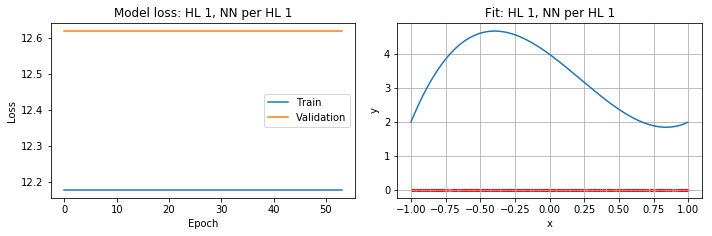

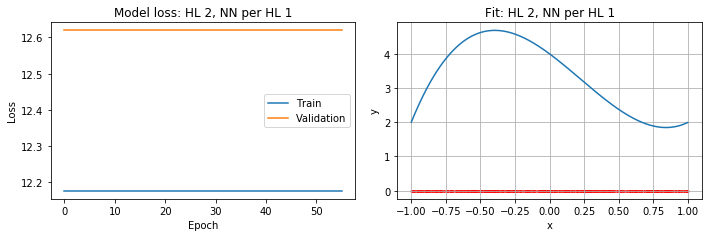

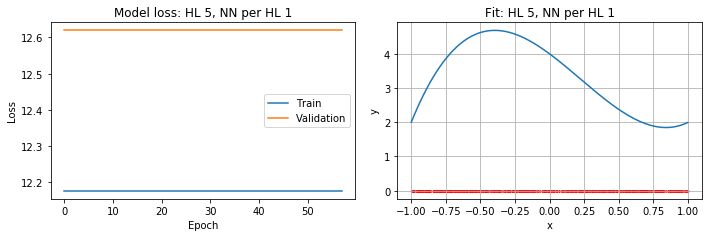

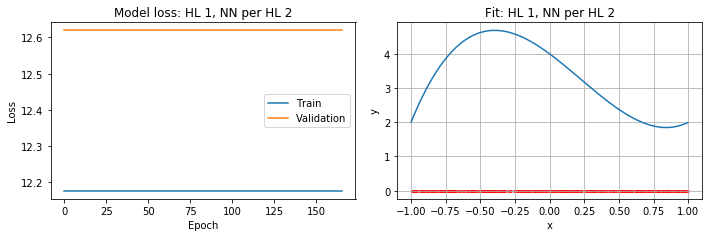

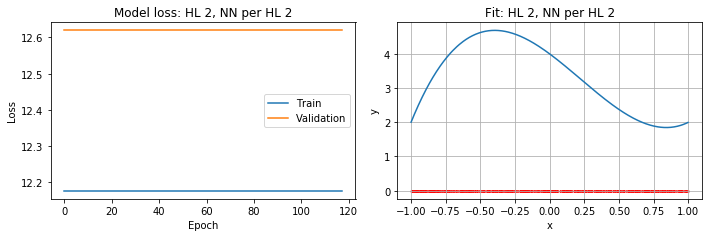

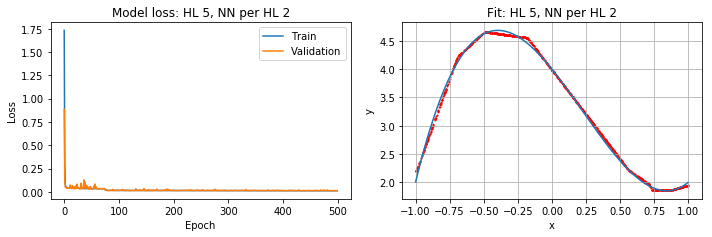

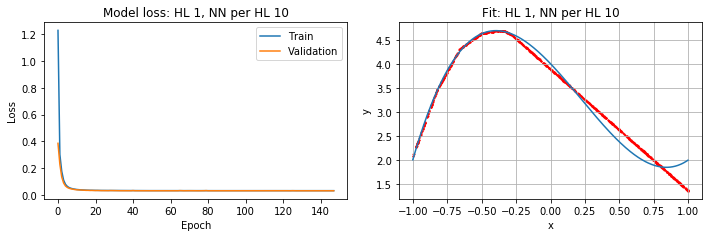

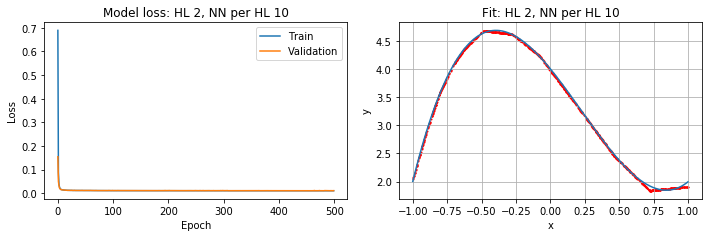

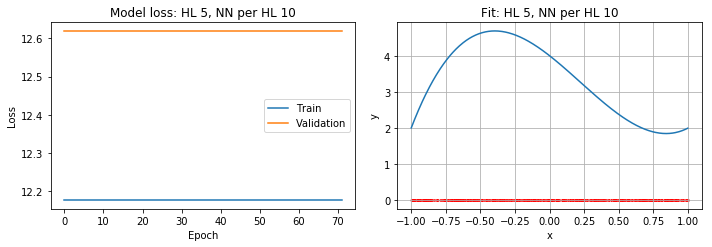

In [9]:
i=1
#hidden layers
n_layers = [1, 2, 5]
#neurons per layer
n_neurons = [1, 2, 10]
row=len(n_layers)*len(n_neurons)
cols=2

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = d+c*x_valid+b*x_valid**2+a*x_valid**3 # ideal (target) poly function

y_train = np.random.normal(d+c*x_train+b*x_train**2+a*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d+c*x_valid+b*x_valid**2+a*x_valid**3, sigma)

for n in n_neurons:
    for l in n_layers:
       
        model = build_model(n, l, 'sgd', 'relu', 'mse' )
        history = train_model(model, x_train, y_train, x_valid, y_valid)

        plt.figure(figsize=(10,3*row))

        plt.subplot(row, cols, i)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss: HL '+str(l)+', NN per HL '+str(n))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()

        plt.subplot(row, cols, i+1)           
        plt.title('Fit: HL '+str(l)+', NN per HL '+str(n))
        x_predicted = np.random.uniform(-1, 1, 1000)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', marker='o', s=1)
        plt.plot(x_valid, y_target)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        i=i+2;


I vary the network topology increasing the number of hidden layer only from one, two and five hidden layer (ignoring the output layer). Then I increase the number of neuron per layer. As we can see from the graphs, if we increase the number of layer keeping 1 neuron per layer, the model can't fit the function. Two neuron with one or two hidden layer could not produce a good model: there are not enough neuron for our parameters. Two neurons for five hidden layer start to work. Ten neurons per one and hidden layer fit worst than the previuos configuration, but still on the right way. Ten neurons for two layer is the best model, instead for ten layer stop to work (maybe we feed the network with not enough data for an huge net). We can try to increase the number of neuron, keeping two hidden layer. 

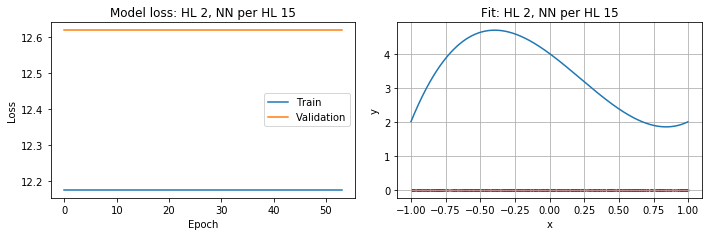

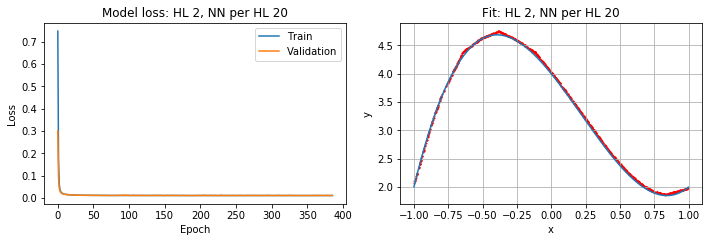

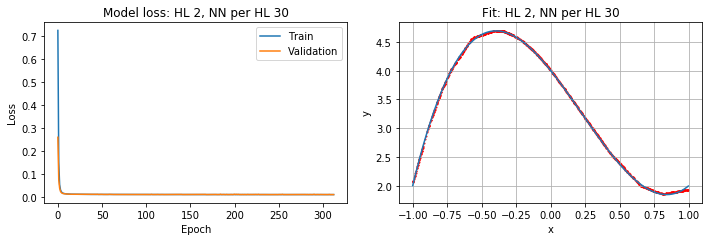

In [10]:
i=1
#neurons per layer
n_neurons = [15,20,30]
# number of layers
l=2 
row=len(n_neurons)
cols=2

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = d+c*x_valid+b*x_valid**2+a*x_valid**3 # ideal (target) poly function

y_train = np.random.normal(d+c*x_train+b*x_train**2+a*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d+c*x_valid+b*x_valid**2+a*x_valid**3, sigma)

for n in n_neurons:

    model = build_model(n, l, 'sgd', 'relu', 'mse' )
    history = train_model(model, x_train, y_train, x_valid, y_valid)
   
    plt.figure(figsize=(10,3*row))

    plt.subplot(row, cols, i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss: HL '+str(l)+', NN per HL '+str(n))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.tight_layout()

    plt.subplot(row, cols, i+1)           
    plt.title('Fit: HL '+str(l)+', NN per HL '+str(n))
    x_predicted = np.random.uniform(-1, 1, 1000)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', marker='o', s=1)
    plt.plot(x_valid, y_target)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    i=i+2;


Now we start to vary the activation function, the optimizer and the loss, keeping fixed the network topology with two hidden layer and 30 neurons.

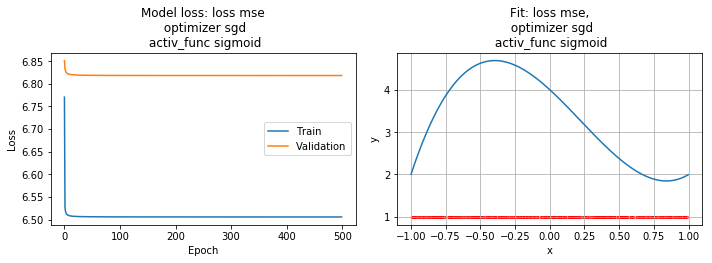

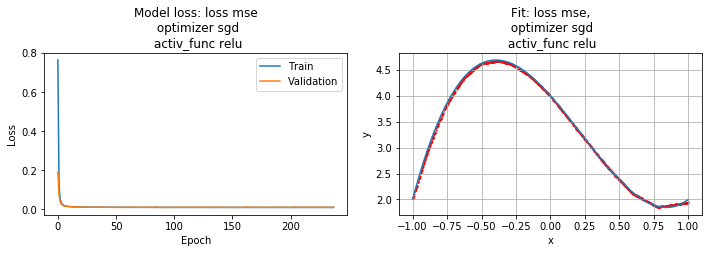

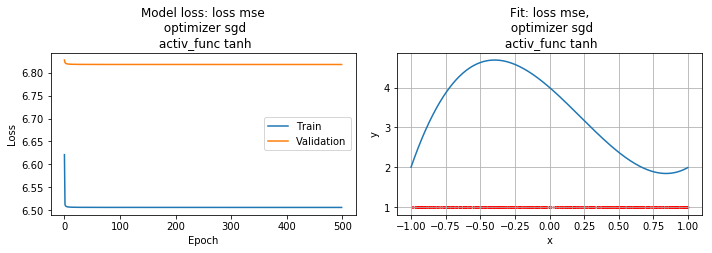

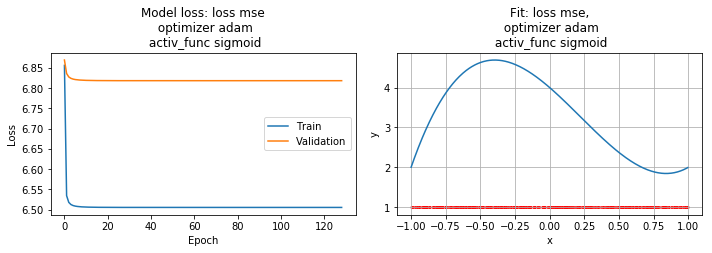

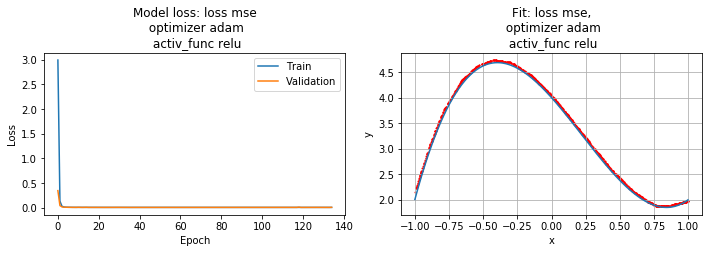

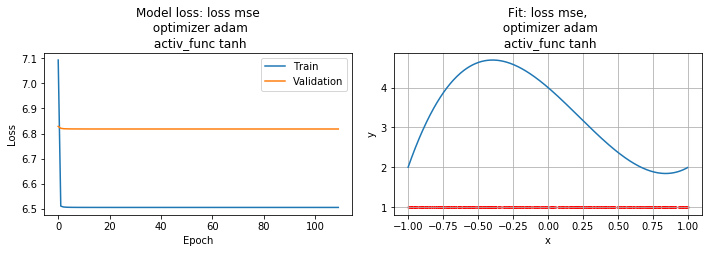

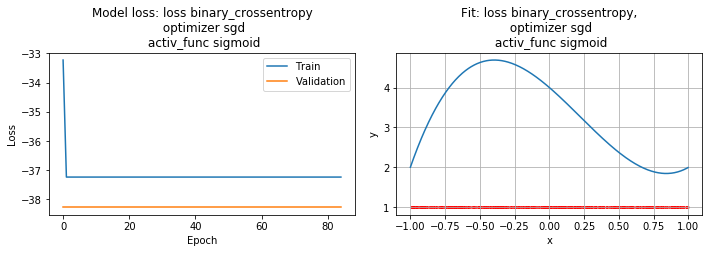

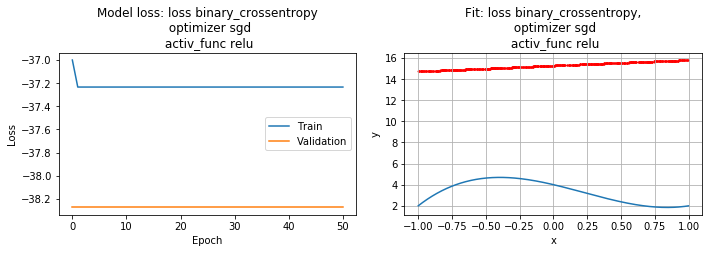

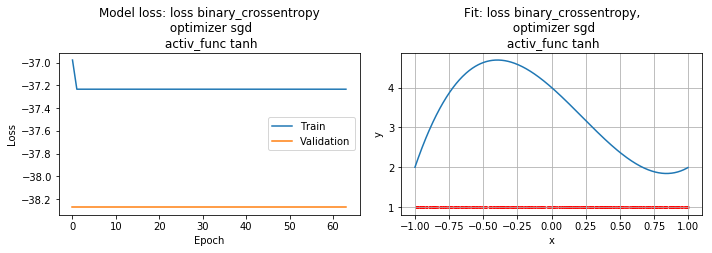

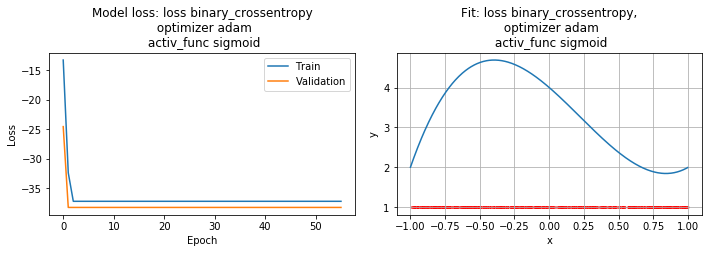

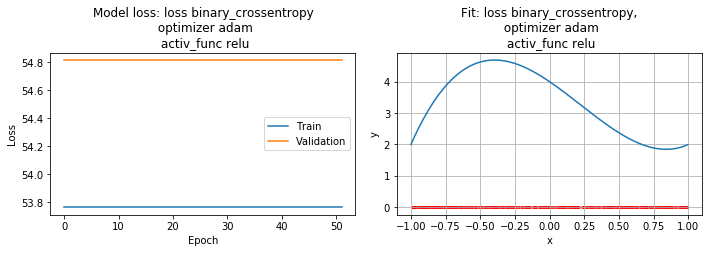

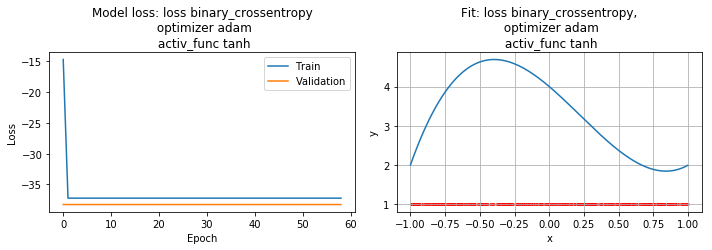

In [6]:
activation_func = ['sigmoid', 'relu', 'tanh']
optimizer = ['sgd', 'adam']
loss = ['mse', 'binary_crossentropy']

i=1
# number of layers
l=2 
row=len(activation_func)*len(optimizer)*len(loss)
cols=2

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = d+c*x_valid+b*x_valid**2+a*x_valid**3 # ideal (target) poly function

y_train = np.random.normal(d+c*x_train+b*x_train**2+a*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d+c*x_valid+b*x_valid**2+a*x_valid**3, sigma)

for lo in loss:
    for o in optimizer:
        for ac in activation_func:
            
            model = build_model(30, l, o, ac, lo)
            history = train_model(model, x_train, y_train, x_valid, y_valid)
            
            plt.figure(figsize=(10,3*row))

            plt.subplot(row, cols, i)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss: loss '+str(lo)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='best')
            plt.tight_layout()

            plt.subplot(row, cols, i+1)           
            plt.title('Fit: loss '+str(lo)+',\n optimizer '+str(o)+'\n activ_func '+str(ac))
            x_predicted = np.random.uniform(-1, 1, 1000)
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r', marker='o', s=1)
            plt.plot(x_valid, y_target)
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            i=i+2;


Now we can set our best model with:
- Two hidden layer
- 30 neuron per hidden layer
- relu activation function
- mse loss
- adam optimizer

and test it outside and inside the trainig range.

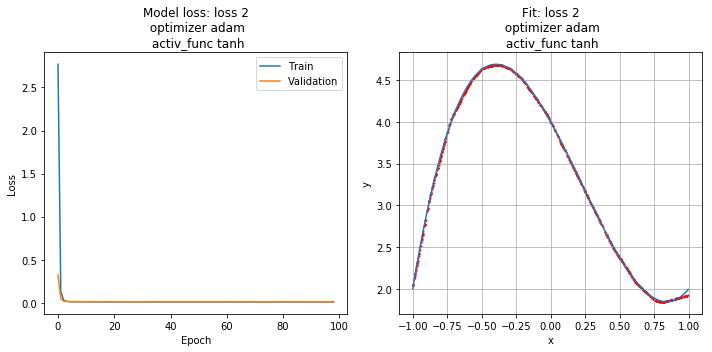

In [7]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = d+c*x_valid+b*x_valid**2+a*x_valid**3 # ideal (target) poly function

y_train = np.random.normal(d+c*x_train+b*x_train**2+a*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d+c*x_valid+b*x_valid**2+a*x_valid**3, sigma)


model = build_model(30, 2, 'adam', 'relu', 'mse')
history = train_model(model, x_train, y_train, x_valid, y_valid)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: loss '+str(l)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)           
plt.title('Fit: loss '+str(l)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', marker='o', s=1)
plt.plot(x_valid, y_target)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.tight_layout()
plt.show()

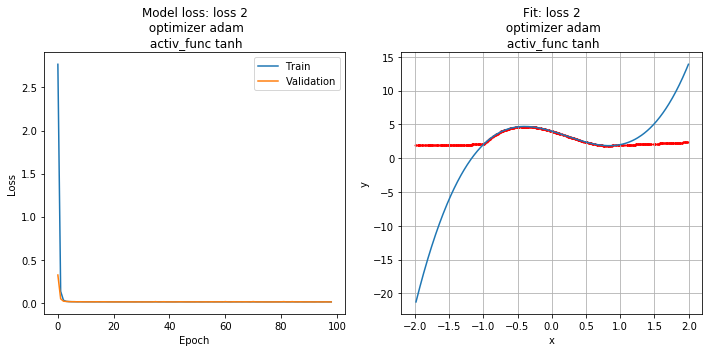

In [8]:
x_valid = np.random.uniform(-2, 2, 1000)
x_valid.sort()
y_target = d+c*x_valid+b*x_valid**2+a*x_valid**3 # ideal (target) poly function

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: loss '+str(l)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)           
plt.title('Fit: loss '+str(l)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
x_predicted = np.random.uniform(-2, 2, 1000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', marker='o', s=1)
plt.plot(x_valid, y_target)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.tight_layout()
plt.show()

Our network is not able to fit the function outside the training range.

### Exercise 11.3
  
$f(x1,x2) = \sin(x1^2+x2^2)$ for $x1 \in [-3/2,3/2]$ and $x2 \in [-3/2,3/2]$.

In [9]:
def build_model(neurons_number, p_optimizer, p_activation, p_loss):
    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(
            neurons_number,
            activation=p_activation,
            kernel_initializer=keras.initializers.RandomNormal(stddev=1),
            bias_initializer=keras.initializers.RandomNormal(stddev=1),
            input_shape=(2,)))

    # output layer must have 1 output neuron
    model.add(keras.layers.Dense(
            1,
            activation=p_activation,
            kernel_initializer=keras.initializers.RandomNormal(stddev=1),
            bias_initializer=keras.initializers.RandomNormal(stddev=1)))   
    
    model.compile(
            loss=p_loss,
            optimizer=p_optimizer,
            metrics=['mse']
            )

    return model

In [10]:
sigma=0.1
# generate training inputs
np.random.seed(0)
x1_train = np.random.uniform(-3./2., 3./2., 10000)
x2_train = np.random.uniform(-3./2., 3./2., 10000)

x1_valid = np.random.uniform(-3./2., 3./2., 1000)
x2_valid = np.random.uniform(-3./2., 3./2., 1000)

x1_valid.sort()
x2_valid.sort() 
y_target = np.sin(x1_valid**2+x2_valid**2)# ideal (target) poly function

y_train = np.random.normal(np.sin(x1_train**2+x2_train**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x1_valid*2+x2_valid**2), sigma)


model = build_model(30,'adam', 'relu', 'mse')

# define earlystop callback
earlystop = keras.callbacks.EarlyStopping(
    monitor='mean_squared_error', min_delta=0.0001,
    patience=8, verbose=0, mode='auto')

callbacks_list = [earlystop]

merged_train = np.transpose(np.array([x1_train, x2_train]))
merged_valid = np.transpose(np.array([x1_valid, x2_valid]))

history = model.fit(x=merged_train, y=y_train, 
        batch_size=32, epochs=500,
        verbose=0,
        callbacks=callbacks_list,
        validation_data=(merged_valid, y_valid),
        shuffle=True)

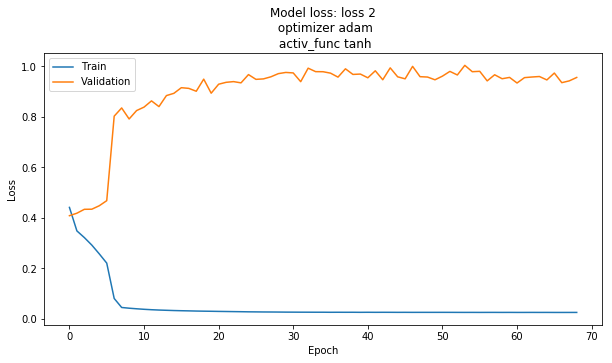

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: loss '+str(l)+'\n optimizer '+str(o)+'\n activ_func '+str(ac))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

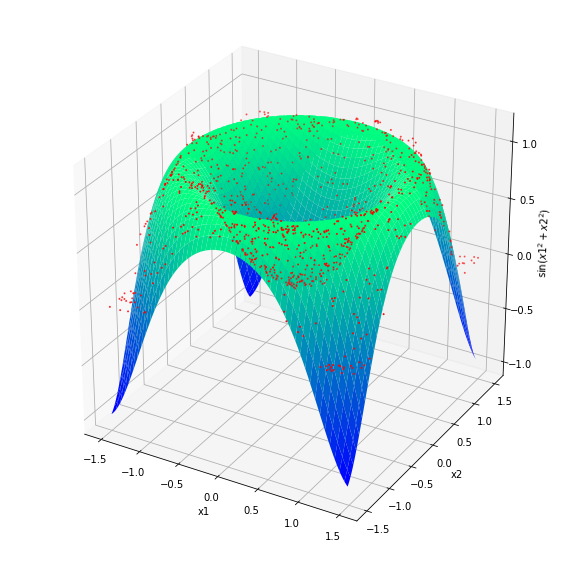

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x1_predicted = np.random.uniform(-3./2., 3./2., 1000)
x2_predicted = np.random.uniform(-3./2., 3./2., 1000)
merged_predicted = np.transpose(np.array([x1_predicted, x2_predicted]))
y_predicted = model.predict(merged_predicted)


fig = plt.figure(figsize=(10,10))

ax = fig.gca(projection='3d')
# Make data.
X = np.arange(-3./2., 3./2., 0.02)
Y = np.arange(-3./2., 3./2., 0.02)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('sin($x1^2+x2^2$)')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.winter,
                       linewidth=0, antialiased=True)
ax.scatter(x1_predicted,x2_predicted, y_predicted,color='r', marker='o', s=1)

plt.show()
